<a href="https://colab.research.google.com/github/richy1996/Springboard_272_Ultimate/blob/main/Ultimate_P1_logins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
# load logins
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins.describe()

<ipython-input-4-f0b670fd4367>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  logins.describe()


,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


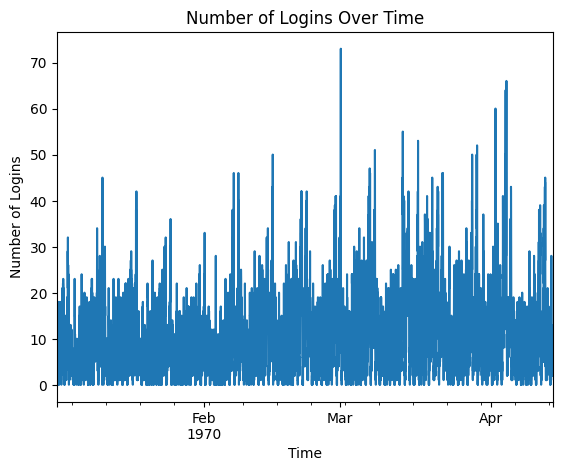

In [16]:
# aggregate into 15 minute intervals and plot count of logins over time

df = logins.set_index('login_time').resample('15T').size()
df.plot()
plt.title('Number of Logins Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.show()

In [11]:
df.describe()

count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
dtype: float64

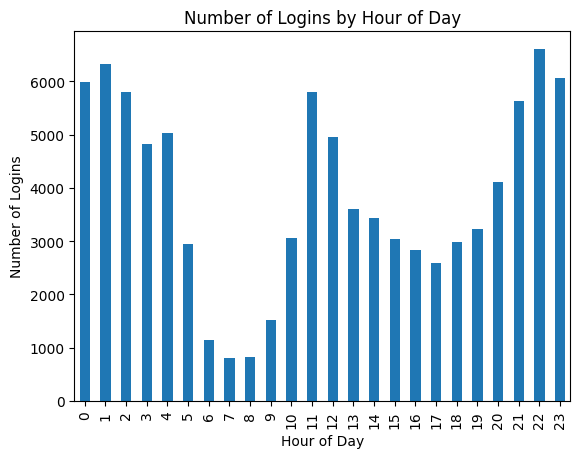

In [34]:
# plot number of logins by hour of day

df = df.to_frame()
df.columns = ['count']
df['hour'] = df.index.hour
df.groupby('hour')['count'].sum().plot(kind='bar')
plt.title('Number of Logins by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.show()

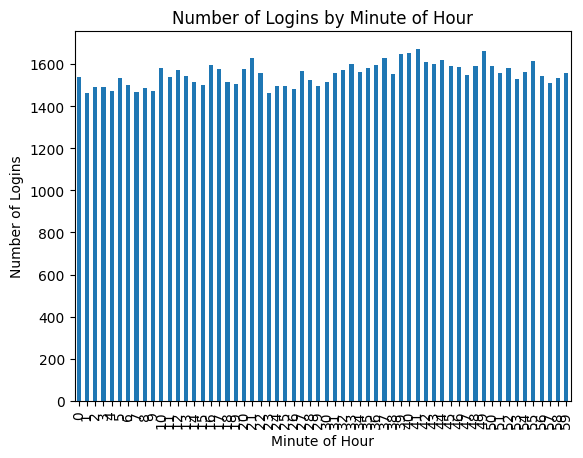

In [44]:
# number of logins by minute of hour

dfm = logins.set_index('login_time').resample('1T').size()

dfm = dfm.to_frame()
dfm.columns = ['count']
dfm['minute'] = dfm.index.minute
dfm.groupby('minute')['count'].sum().plot(kind='bar')
plt.title('Number of Logins by Minute of Hour')
plt.xlabel('Minute of Hour')
plt.ylabel('Number of Logins')
plt.show()

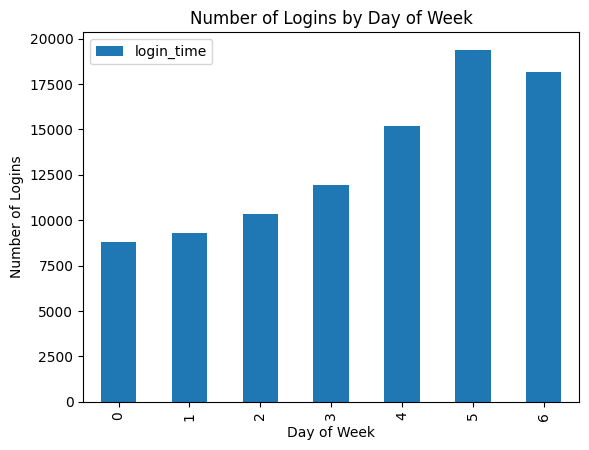

In [43]:
# get day of week from login_time

logins['dayofweek'] = logins['login_time'].dt.dayofweek

# group by day of week and count and plot

logins.groupby('dayofweek').count().plot(kind='bar')
plt.title('Number of Logins by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Logins')
plt.show()

## Results

- Number of logins increases by day of week
    - 0 = Monday
- Uniformly distributed within each hour
- Dips from 5-10th hours and 13-20th or so
- Relatively stable over the entire period